In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Global settings for nice plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]



from scipy.integrate import quad
from scipy.signal import square



print("Libraries imported successfully.")

Libraries imported successfully.


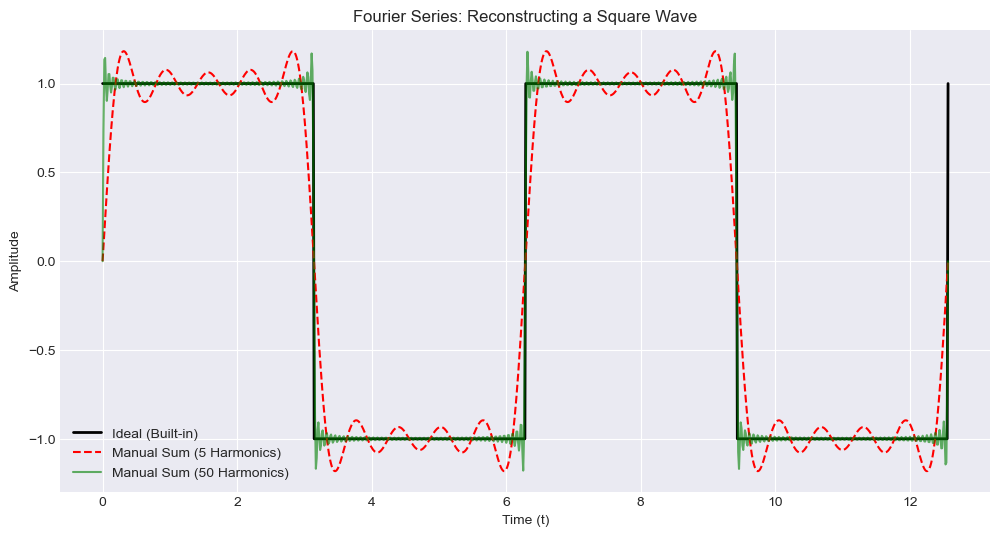

In [16]:
# --- SETUP ---
# Time vector: 0 to 4*pi (2 periods), 1000 points resolution
t = np.linspace(0, 4 * np.pi, 1000)

# 1. TRADITIONAL METHOD: Summing Harmonics Manually
def manual_fourier_series(t, n_harmonics):
    signal = np.zeros_like(t)
    
    # Loop through odd harmonics: n = 1, 3, 5...
    for i in range(1, n_harmonics * 2, 2):
        # Formula: (4/pi) * (1/n) * sin(n*t)
        bn = 4 / (np.pi * i)
        harmonic = bn * np.sin(i * t)
        signal += harmonic
    return signal

# Let's reconstruct with 5 harmonics and 50 harmonics
signal_5 = manual_fourier_series(t, 5)
signal_50 = manual_fourier_series(t, 50)

# 2. BUILT-IN METHOD: Generating the Ideal Square Wave
# Scipy has a built-in function to generate the perfect target wave
from scipy.signal import square
ideal_signal = square(t)

# --- PLOTTING ---
plt.figure()
plt.plot(t, ideal_signal, 'k', linewidth=2, label='Ideal (Built-in)')
plt.plot(t, signal_5, 'r--', label='Manual Sum (5 Harmonics)')
plt.plot(t, signal_50, 'g', alpha=0.6, label='Manual Sum (50 Harmonics)')
plt.title('Fourier Series: Reconstructing a Square Wave')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [17]:
# Period T and fundamental angular frequency omega_0
T = 2 * np.pi
omega_0 = 1 

def square_wave_func(t):
    """Defines the square wave for t in [0, 2*pi] with amplitude 1."""
    # We use a simple conditional definition for accuracy in integration
    if 0 <= t < np.pi:
        return 1.0
    elif np.pi <= t < 2 * np.pi:
        return -1.0
    else:
        # Handle periodicity for t outside the main interval
        t_mod = np.mod(t, T)
        return square_wave_func(t_mod)

# Calculate a0
a0 = (1/T) * quad(square_wave_func, 0, T)[0]

# Calculate an
def an_integrand(t, n):
    return square_wave_func(t) * np.cos(n * omega_0 * t)

# Calculate bn
def bn_integrand(t, n):
    return square_wave_func(t) * np.sin(n * omega_0 * t)

In [18]:
# Results list to store [n, an, bn]
results = []
N_HARMONICS = 7 # Calculate up to the 7th harmonic

print(f"--- Fourier Series Coefficients (T={T:.2f}) ---")
print(f"a0 (DC Component): {a0:.4f}")

for n in range(1, N_HARMONICS + 1):
    # a_n calculation
    a_n_integral = quad(an_integrand, 0, T, args=(n,))[0]
    a_n = (2/T) * a_n_integral
    
    # b_n calculation
    b_n_integral = quad(bn_integrand, 0, T, args=(n,))[0]
    b_n = (2/T) * b_n_integral

    results.append({'n': n, 'an': a_n, 'bn': b_n})
    
    # Print only non-zero or significant results
    if abs(b_n) > 1e-4:
        print(f"n={n}: a_n = {a_n:.4e}, b_n = {b_n:.4f} (Expected: 4/{n}π)")
    elif abs(a_n) > 1e-4:
        print(f"n={n}: a_n = {a_n:.4f}, b_n = {b_n:.4e}")

# Analytical Check: 4/(n*pi) for odd n, 0 otherwise
print("-" * 40)
print(f"Analytical Check for n=1: {4/(1*np.pi):.4f}")
print(f"Analytical Check for n=3: {4/(3*np.pi):.4f}")

--- Fourier Series Coefficients (T=6.28) ---
a0 (DC Component): 0.0000
n=1: a_n = 1.2325e-16, b_n = 1.2732 (Expected: 4/1π)
n=3: a_n = -2.9885e-17, b_n = 0.4244 (Expected: 4/3π)
n=5: a_n = 4.0416e-16, b_n = 0.2546 (Expected: 4/5π)
n=7: a_n = 4.4317e-17, b_n = 0.1819 (Expected: 4/7π)
----------------------------------------
Analytical Check for n=1: 1.2732
Analytical Check for n=3: 0.4244


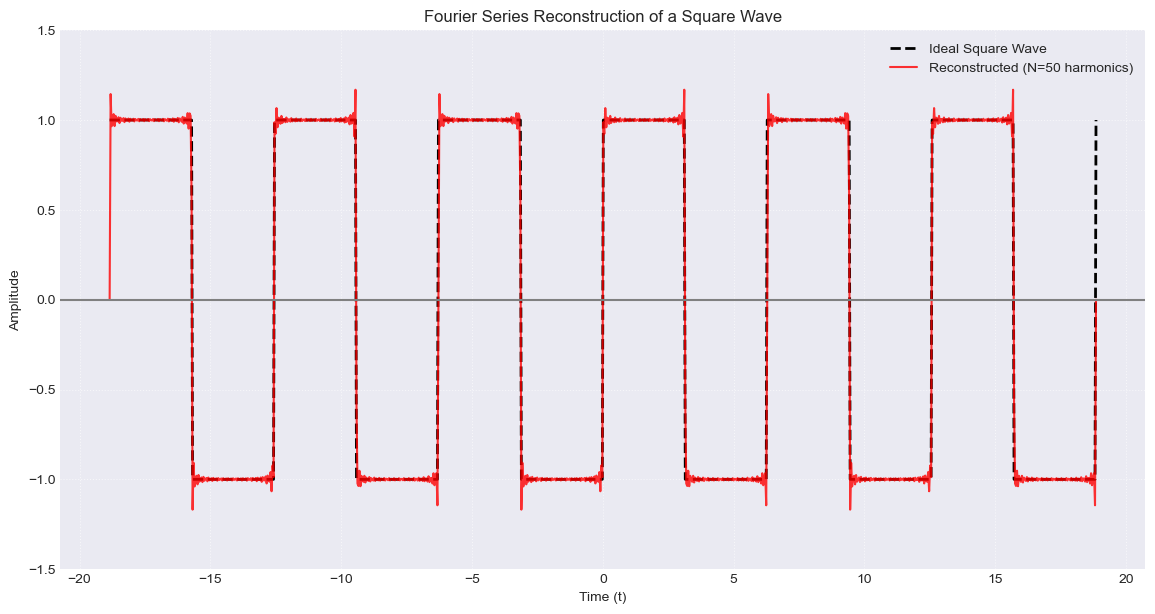

In [19]:


# --- PARAMETERS ---
T = 2 * np.pi          # Period
N_POINTS = 1000        # Number of samples in the time vector
N_HARMONICS = 50       # Number of odd harmonics to include (n=1, 3, 5, ..., 99)

# --- 1. SETUP TIME VECTOR AND IDEAL SIGNAL ---
# Create time vector spanning 3 periods
t = np.linspace(-3*T, 3*T, N_POINTS)

# Ideal square wave (for comparison)
# We set the square wave function to have a period of 2*pi (T=2*pi)
ideal_signal = square(t)

# --- 2. FOURIER SERIES RECONSTRUCTION ---
# Initialize the reconstructed signal
reconstructed_signal = np.zeros_like(t)

# Calculate the reconstructed signal using the non-zero coefficients (bn)
for n in range(1, 2 * N_HARMONICS, 2):  # Loop through n = 1, 3, 5, ...
    # The coefficient bn is 4 / (n * pi)
    bn = 4 / (n * np.pi)
    
    # Add the harmonic: bn * sin(n*t) since omega_0 = 1
    reconstructed_signal += bn * np.sin(n * t)

# --- 3. PLOTTING ---
plt.figure(figsize=(14, 7))

# Plot the ideal signal
plt.plot(t, ideal_signal, 'k--', linewidth=2, label='Ideal Square Wave')

# Plot the reconstructed signal
plt.plot(t, reconstructed_signal, 'r', linewidth=1.5, alpha=0.8, label=f'Reconstructed (N={N_HARMONICS} harmonics)')

plt.title('Fourier Series Reconstruction of a Square Wave')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='gray', linestyle='-')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()